# Support Vector Machine 
Support vector machines are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis

## Importing Modules
- `numpy` for array processing
- `matplotlib.pyplot` for visualization
- `pandas` for loading and processing dataset
- `sklearn` for creating Support Vector Classifier model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

## Loading Dataset
The Social Network ads dataset is a categorical dataset to determine whether a user purchased a particular product.

In [10]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')
display(df[25:30])

,User ID,Gender,Age,EstimatedSalary,Purchased
25,15631159,Male,47,20000,1
26,15792818,Male,49,28000,1
27,15633531,Female,47,30000,1
28,15744529,Male,29,43000,0
29,15669656,Male,31,18000,0


In [11]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Preprocessing the data

In [12]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Training

In [13]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

## Evaluation 

In [22]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_pred, y_test)
accuracy = accuracy_score(y_pred, y_test)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[64  3]
 [ 4 29]]
Accuracy: 0.93


## Visualization 

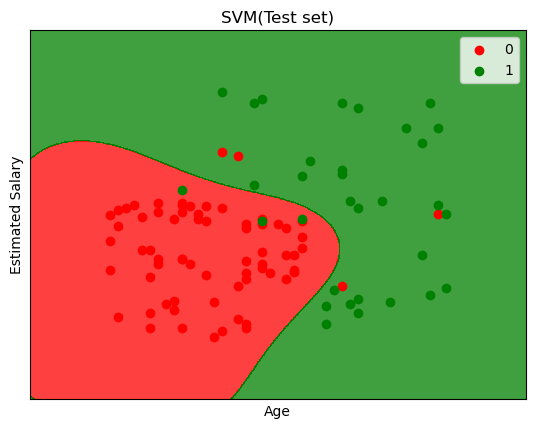

In [19]:
X1, X2 = np.meshgrid(
    np.arange(start=x_test[:, 0].min()-1, stop=x_test[:, 0].max() + 1, step=0.01), 
    np.arange(start=x_test[:, 1].min()-1, stop=x_test[:, 1].max() + 1, step=0.01)
)
plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, 
    cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i , j in enumerate(np.unique(y_test)):
    plt.scatter(x_test[y_test==j, 0], x_test[y_test==j, 1], color=ListedColormap(('red', 'green'))(i), label=j)
    
plt.title('SVM(Test set)')
plt.xlabel('Age')
plt.xticks(())
plt.yticks(())
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()